In [1]:
from IPython.display import display, Math, Latex

### Some parameters

In [2]:
# plotting a prameters
scale_factor = 1.5

labels = 16 * scale_factor
ticks = 10 * scale_factor
# ticks = 10 * scale_factor
legends = 12 * scale_factor
text = 14 * scale_factor
titles = 22 * scale_factor
lw = 3 * scale_factor
ps = 200 * scale_factor
cmap = 'magma'

colors = ['firebrick', 'steelblue', 'darkorange', 'darkviolet', 'cyan', 'magenta', 'darkgreen', 'deeppink']
markers = ['x', 'o', '+', '>', '*', 'D', '4']
linestyles = ['-', '--', ':', '-.']

### Some functions

In [3]:
from matplotlib import cm 
from matplotlib import rc as mplrc
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def plot_image(image: list, category: str='', cmap: str='viridis', show_ticks: bool=True):
    
    '''Plots an image'''
    
    plt.figure(figsize=(8.5, 8.))
    
    plt.imshow(image, cmap=cmap)
    
    if show_ticks:
        plt.xticks(fontsize=ticks)
        plt.yticks(fontsize=ticks)
    else:
        plt.xticks([])
        plt.yticks([])
        
    if category != '':
        plt.title(category, fontsize=titles)
        
    plt.show()
    
def plot_image_panel(images: list, labels: list=[], cmap: str='viridis', show_ticks: bool=True):
    
    '''Plots a 2x2 panel of images'''
    
    mplrc('xtick', labelsize=ticks) 
    mplrc('ytick', labelsize=ticks)
    mplrc('axes', titlesize=titles)
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12., 12.))
    
    for (i, image) in enumerate(images):
        if i > 1:
            ax = axs[1, i % 2]
        else:
            ax = axs[0, i]
        
        ax.imshow(image, cmap=cmap)
        if len(labels) > i and labels[i] != '':
            ax.set_title(labels[i])
        if i % 2 == 1:
            ax.set_yticks([])
            ax.set_yticks([])
    
        if not show_ticks:
            ax.set_xticks([])
            ax.set_yticks([])
        
    plt.show()

def plot_curves(curves: list, plot_labels: list=[], cmap: str='viridis', show_ticks: bool=True, 
                xlabel: str='x', ylabel: str='y', xscale: str='', yscale: str=''):
    
    '''Plots multiple curves on the same plot'''
    
    mplrc('xtick', labelsize=ticks) 
    mplrc('ytick', labelsize=ticks)
    mplrc('axes', titlesize=titles)
    
    if len(curves) > len(colors):
        these_colors = cm.get_cmap('viridis', len(curves)).colors
    else:
        these_colors = colors
    
    fig = plt.figure(figsize=(8., 6.))
    
    for (i, curve) in enumerate(curves):
        
        plt.plot(curve[0], curve[1], lw=lw, c=colors[i], label=plot_labels[i])
        
    plt.legend(loc='best', fontsize=legends)
    plt.xlabel(xlabel, fontsize=labels)
    plt.ylabel(ylabel, fontsize=labels)
    plt.xticks(fontsize=ticks)
    plt.yticks(fontsize=ticks)
    
    if xscale == 'log':
        plt.xscale('log')
    if yscale == 'log':
        plt.yscale('log')

    plt.show()
    

def plot_activations(objective: str='regression', alpha: float=1.):

    
    xs = np.linspace(-4, 4, 100)
    
    if objective == 'regression':
        
        relu_ = np.array([get_relu(x) for x in xs])
        elu_ = np.array([get_elu(x, alpha=alpha) for x in xs])
        silu_ = np.array([get_silu(x) for x in xs])
        gelu_ = np.array([get_gelu(x) for x in xs])
        
        curves = [[xs, relu_], [xs, elu_], [xs, silu_], [xs, gelu_]]
        plot_labels = ['ReLU', 'ELU', 'SiLU', 'GELU']
        
    else:
        sigmoid_ = np.array([get_sigmoid(x) for x in xs])
        tanh_ = np.array([np.tanh(x) for x in xs])
        curves = [[xs, sigmoid_], [xs, tanh_]]
        plot_labels = ['Sigmoid', 'tanh']
        
    
    plot_curves(curves, plot_labels)

# Convolutional Neural Network (CNN)

CNNs (convolutional neural networks) are designed to process images in a way similar to mammalian brains. They are the bread and butter of computer vision, but models such as vision transformers are becomming increasingly useful and common (more on that later).

<img src="imgs/cnn.png" style="height:600px" class="center" alt="cnn"/><br>

#### Vanilla CNN overview

The basic idea is that a "kernel" slides across an image and convolves the pixels that it currently covers (i.e. unravels kernel and pixels and takes dot product). After the entire image has been convolved, it is then activated and pooled to reduce the dimension. A typical pooling procedire is to return the maximum of a 2x2 block. Each convolutional layer has multiple "channels" each of which have different kernels. The point of trianing is to get a set of kernels that can effectively analyze the image. One kernel may look at edges, another at corners, etc.

After this has been done some number of times, the output is flattened into a N-dimensional vector. This vector is then fed through a typical multilayer perceptron (MLP), which is just a normal neural network. Depending on the problem, this may output a vector representing the class of the input (classification) or a simple numerical vector (regression).

[Demo](https://adamharley.com/nn_vis/cnn/2d.html)

#### Advanced CNNs

While this simple view of convolutions has been very successful, current ML problems are often too complex for them. This has led to the introduction of more advanced methods.

##### Residual Blocks (ResNet)

<div>
<img src="imgs/residual-block.svg" width="500" style="display=block; margin:auto" align="center"/>
</div>

Residual blocks have been shown to be one of the most powerful additions to CNNs, and essentially all models now use them to some extent. [ResNet](https://arxiv.org/abs/1512.03385) was the original model that introduced them.

The basic idea is that a layer is input through a typical convolutional block while at the same time being added, unchanged, to the resulting output. This more or less allows the network to learn the identity matrix (i.e. $g(\textbf{x}) = 0$), which can speed up training and convergence.

There has been a lot of development in the specifics of residual blocks, and they have been combined with other architectures such as transformers (ConvNext), but the basic idea was the core insight.

##### Transformers

Transformers are relatively new (introduced in [2017](https://arxiv.org/abs/1706.03762)) and were originally designed for natural language processing. They are a qualitatively different type of arthitecture that dispenses with recurrence and uses self-attention. This comes with many benefits including parallel assessment of the sequence and a much more thorough global analysis of the relations between inputs. Recurrent neural networks are more or less obsolete at this point. Everything is a transformer.

<div>
<img src="imgs/transformer.png" width="500" style="display=block; margin:auto"/>
</div>

In [2020](https://arxiv.org/abs/2010.11929), it was realized that the same concept can be applied to images. This was the introduction of the vision transformer (ViT). The image is broken up into patches that are passed through a normal transformer. This brings the global benefits analysis benefits of a normal transformer and significantly reduces computational requirements. Vision transformers are probably the future. 


They are much more complicated conceptually than CNNs, so we won't go into them any further. For now. We probably will after language models (i.e. the original transformer).

<div>
<img src="imgs/vit.png" width="1000"/>
</div>

# Run

In [5]:
import random

import pandas as pd
import PIL

import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint, progress
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import WandbLogger, TensorBoardLogger

from sklearn.model_selection import train_test_split

import torch
from torch import nn, Tensor
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.data import DataLoader, Dataset, RandomSampler, random_split

import torchmetrics

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as T

In [6]:
### Set seed for reproducibility
np.random.seed(123)
random.seed(123)
torch.manual_seed(123)

## Download data

In [7]:
### Download fashion MNIST
train_dataset = datasets.FashionMNIST(
    root='./data', train=True, download=True,)
test_dataset = datasets.FashionMNIST(
    root='./data', train=False, download=True,)

In [8]:
### Get possible classes in data
classes = train_dataset.classes

## Prepare data

In [9]:
X_train = train_dataset.data.detach().numpy()
y_train = train_dataset.targets.detach().numpy()

X_test = test_dataset.data.detach().numpy()
y_test = test_dataset.targets.detach().numpy()

In [10]:
### PyTorch uses Dataset objects to load the data during training and testing
class MNISTDataset(Dataset):

    """Data set"""

    def __init__(
        self,
        X, y, transforms: list=None, is_train: bool=False
    ):
        '''Assign data'''
        self.X, self.y = X, y
        self.transforms = transforms
        self.is_train = is_train
        
    def __len__(self):
        '''function to get the length of the dataset'''
        return len(self.X)

    def __getitem__(self, idx: int):
        '''return an x, y pair'''
        x_, y_ = self.X[idx], self.y[idx]
        
        return torch.from_numpy(x_).float(), y_


In [11]:
# split into validation and training data
val_split = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                     test_size=val_split,
                                                     random_state=123)

In [12]:
# add channel axes (N, H, W) -> (N, C, H, W) because C = 1 in this case
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
X_val = X_val[:, np.newaxis, :, :]

In [13]:
# get H = W
input_xy = X_train.shape[-1]

In [14]:
batch_size = 64

In [15]:
##### Now we actually make the dataset and dataloader in PyTorch fashion
train_data = MNISTDataset(X_train, y_train, is_train=True,)
val_data = MNISTDataset(X_val, y_val)
test_data = MNISTDataset(X_test, y_test)

# make the loader
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data)

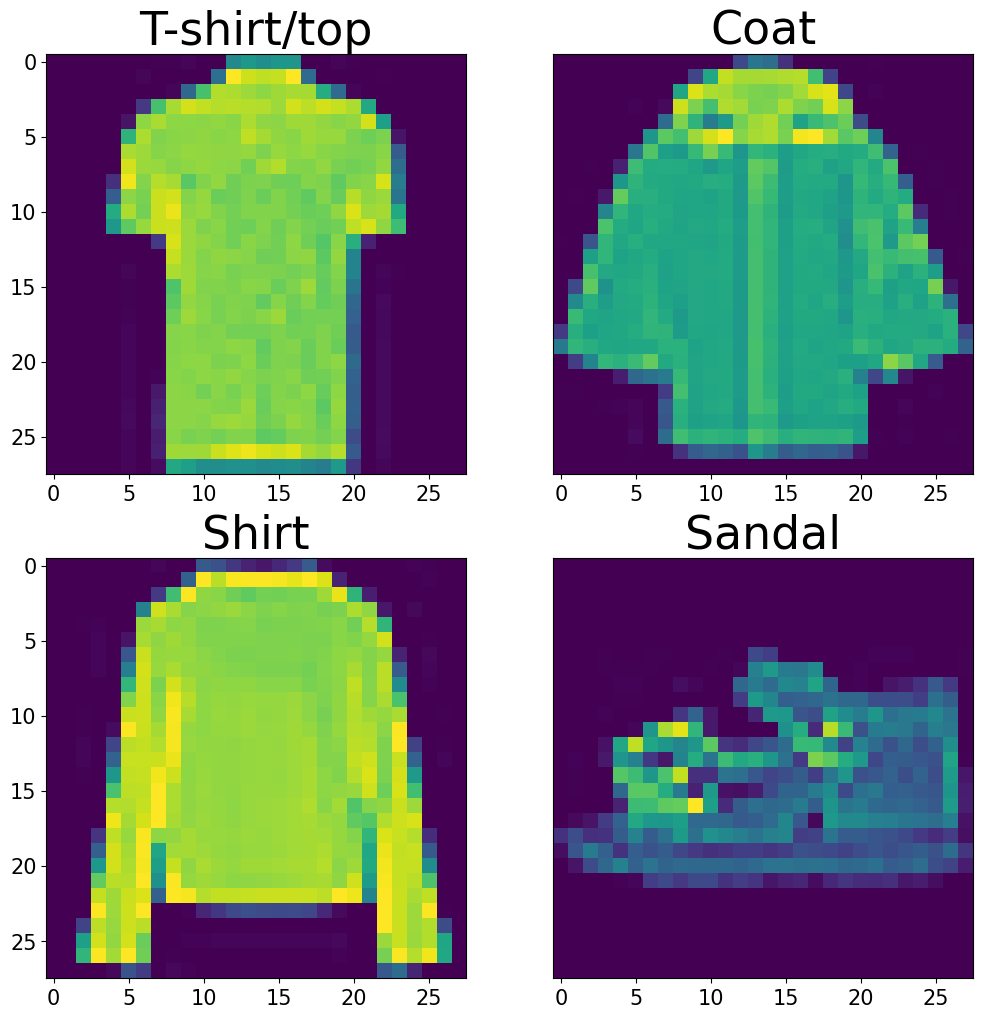

In [16]:
## plot some data
plot_classes = [classes[y_train[i]] for i in range(4)]
plot_image_panel(X_train[:4, 0], labels=plot_classes)

## Define Model

In [17]:
class SimpleCNN(pl.LightningModule):

    def __init__(self, 
                 n_cnn_layers: int = 3, 
                 n_mlp_layers: int = 2,
                 kernel_size: int = 3, 
                 dropout: float = 0.25,
                 cnn_layer_dim: int = 64,
                 mlp_layer_dim: int = 128,
                 padding: int = 0, 
                 stride: int = 1,
                 n_classes: int = 10, 
                 n_channels: int = 1,
                 input_xy: int = 28, 
                 lr: float = 1e-4, 
                 weight_decay: float = 0., 
                 eps: float = 5e-7, 
                 activation: torch.nn.functional=F.relu,
                 use_wandb: bool=False,
                 scheduler_name: str = "none",
                 step_size: int = 5,
                 gamma: float = 0.5,
                 ) -> None:
        super().__init__()
        ### Always need to call above function first in order
        ### to properly initialize a model
        '''Basic CNN to classify fashion MNIST
        We aren't going to both with some of the fancier stuff from the MLP, but it's easy enough to apply here too
        '''
        
        # model parameters
        self.cnn_dim = cnn_layer_dim
        self.mlp_dim = mlp_layer_dim
        self.activation = activation
        self.lr = lr
        self.eps = eps
        self.weight_decay = weight_decay
        self.dropout = dropout
        self.n_channels = n_channels
        self.scheduler_name = scheduler_name
        # if using a scheduler
        self.step_size = step_size
        self.gamma = gamma

        self.softmax = nn.Softmax(dim=1)
        
        # log using WandB or TensorBoard
        self.use_wandb = use_wandb
        
        # functions that keep track of accuracy during validation and testing
        self.val_accuracy = torchmetrics.Accuracy("multiclass", num_classes=n_classes)
        self.test_accuracy = torchmetrics.Accuracy("multiclass", num_classes=n_classes)

        
        # what the input data looks like (allows construction of graph for logging)
        # (batch_size, channels, height, width)
        self.example_input_array = torch.zeros(
            (1, n_channels, input_xy, input_xy,),
            dtype=torch.float32
        )
        
        #### Construct the layers #####
        ## get input layer
        ## shape = (C, H, W) -> (cnn_layer_dim, H, W)
        self.input_cnn = nn.Conv2d(n_channels, cnn_layer_dim, 
                                   kernel_size=kernel_size, stride=stride, padding=padding)
        
        ## make CNN hidden layers
        self.cnn_layers = []
        for i in range(1, n_cnn_layers):
            ##
            self.cnn_layers.append(nn.Conv2d(cnn_layer_dim, cnn_layer_dim, 
                                       kernel_size=kernel_size, stride=stride, padding=padding))

        self.cnn_layers = nn.ModuleList(self.cnn_layers)
        
        # get dimension of flat layer
        flat_dim = self._flat_layer_size()
        
        # flatten output
        self.flat = nn.Linear(int(flat_dim), mlp_layer_dim)
        
        # make MLP
        self.mlp_layers = []
        for i in range(1, n_mlp_layers):
            self.mlp_layers.append(nn.Linear(mlp_layer_dim, mlp_layer_dim))
        self.mlp_layers = nn.ModuleList(self.mlp_layers)
        
        # final output layer
        self.output = nn.Linear(mlp_layer_dim, n_classes)

        self.init_weights()
        
        # self.network = []
        
                
    def _flat_layer_size(self) -> int:
        
        '''Gets the dimension of the flattened CNN output layer'''
        
        x = self.example_input_array
        
        # Pass the input tensor through the CNN layers
        x = self.input_cnn(x)
        x = F.max_pool2d(x, 2)
        for layer in self.cnn_layers:
            x = layer(x)
            x = F.max_pool2d(x, 2)

        # Calculate the flattened layer dimension
        flattened_dim = x.view(1, -1).size(1)

        return flattened_dim
                

    def forward(self, x):
        '''Determines how data is passed through the network, 
           i.e creates the connectivity of the network'''
        
        ## send through input layer and activate
        x = self.activation(self.input_cnn(x))
        ## do max pooling (2x2)
        x = F.max_pool2d(x, 2)
            
        # pass through CNN
        for layer in self.cnn_layers:
            # pass through layer and activate
            x = self.activation(layer(x))
            # pool
            x = F.max_pool2d(x, 2)
        
        # flatten output CNN layer to pass through MLP
        x = x.view(x.size(0), -1)
        # pass through MLP
        x = self.flat(x)
        for layer in self.mlp_layers:
            x = self.activation(layer(x))
            
        # return output
        x = self.output(x)

        return x

    def configure_optimizers(self) -> (list, list):
        """Set up the optimizer and potential learning rate scheduler"""
        self.optimizer = torch.optim.AdamW(
            self.parameters(),
            lr=self.lr,
            eps=self.eps,
            weight_decay=self.weight_decay,
        )

        if self.scheduler_name == "none":
            return self.optimizer

        ### this decreases the learning rate by a factor of gamma every step_size
        self.scheduler = MultiStepLR(
            self.optimizer,
            list(range(0, self.trainer.max_epochs, self.step_size)),
            gamma=self.gamma,
        )

        return [self.optimizer], [{"scheduler": self.scheduler, "interval": "epoch"}]
        
    #### need to add these two things in case the scheduler is used ####
    def lr_scheduler_step(self, scheduler, metric) -> None:
        if self.scheduler_name != "none":
            self.scheduler.step()

    def on_epoch_end(self) -> None:
        if self.scheduler_name != "none":
            self.scheduler.step()

    def init_weights(self) -> None:
        ### does some fancy layer weight initialization
        for layer in self.mlp_layers:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)

    def process_batch(self, batch, step: str = "train"):
        """Passes and logs a batch for a given type of step (test, train, validation)"""
        
        # get data
        x, y = batch

        # pass through network
        # logits have no activation applied
        logits = self(x)
        
        ## get loss
        ## F.cross_entropy applies softmax then gets cross entropy,
        ## so we don't need to activate the network output
        loss = F.cross_entropy(logits, y) 
        
        # record the loss
        self.log(f"{step}_loss", loss)
        if step in ["val", "test"]:
            scores = self.softmax(logits)
            # predicted class is the one with the maximum output probability
            preds = torch.argmax(scores, dim=1)
            # get accuracy
            if step == "val":
                self.val_accuracy.update(preds, y)
                acc = float(self.val_accuracy(preds, y).detach().cpu().numpy().item())
            else:
                self.test_accuracy.update(preds, y)
                acc = float(self.test_accuracy(preds, y).detach().cpu().numpy().item())
            self.log(f"{step}_acc", acc)
            
        
        # upload the loss to WandB
        if self.use_wandb:
            log_dict = {f"{step}_loss": loss,}
            if step in ["val", "test"]:
                log_dict[f"{step}_accuracy"] = acc
            wandb.log(log_dict)
                    
        return loss
    
    def training_step(self, batch, batch_idx):
        """What do do with a training batch"""
        
        return self.process_batch(batch, step="train")

    def validation_step(self, batch, batch_idx):
        '''Validation step (at the end of each epoch)'''
        
        return self.process_batch(batch, step="val")
        
    def test_step(self, batch, batch_idx):
        
        '''Test step is essentially the same as a validation step in this instance'''
        return self.process_batch(batch, step="test")

    def activation_maps(self, x, depth: int=0) -> np.ndarray:
        
        '''Gets output activation of an arbitary CNN layer'''
        
        i = 0
        # input layer
        x = self.activation(self.input_cnn(x))
        
        if depth == 0:
            return x.detach().numpy()
        
        i += 1
        x = F.max_pool2d(x, 2)
            
        # pass through CNN and return when you reach the appropriate depth
        for layer in self.cnn_layers:
            x = self.activation(layer(x))
            if i == depth:
                return x.detach().numpy()
            i += 1
            x = F.max_pool2d(x, 2)


In [18]:
# model hyper parameters 
lr = 1e-3
eps = 1e-8
weight_decay = 1e-6
n_cnn_layers = 3
n_mlp_layers = 6
dropout = 0.25
cnn_layer_dim  = 64
mlp_layer_dim = 128
n_classes = 10
activation = F.gelu
n_channels = 1
stride = 1
kernel_size = 3
padding = 1
scheduler_name = "step"
gamma = 0.5
step_size = 5

## WandB stuff
# log with WandB or TensorBoard
use_wandb = False
# do hyperparameter sweep with WandB
use_sweep = False
# WandB project name
project_name = 'SimpleMNIST_CNN'
# WandB lab name
entity = ''

In [19]:
cnn_hparams = {'lr': lr,
                 'eps': eps,
                 'weight_decay': weight_decay,
                 'n_cnn_layers': n_cnn_layers,
                 'n_mlp_layers': n_mlp_layers,
                 'dropout': dropout,
                 'cnn_layer_dim': cnn_layer_dim,
                 'mlp_layer_dim': mlp_layer_dim,
                 'padding': padding,
                 'kernel_size': kernel_size,
}

In [20]:
cnn_model = SimpleCNN(
                  n_cnn_layers=n_cnn_layers, 
                  n_mlp_layers=n_mlp_layers, 
                  cnn_layer_dim=cnn_layer_dim, 
                  mlp_layer_dim=mlp_layer_dim,
                  n_classes=n_classes, 
                  input_xy=input_xy, 
                  activation=activation, 
                  n_channels=n_channels,
                  use_wandb=use_wandb,
                  dropout=dropout, 
                  padding=padding,
                  eps=eps, lr=lr, 
                  weight_decay=weight_decay,
                  scheduler_name=scheduler_name,
                  gamma=gamma,
                  step_size=step_size,
)



## Train

In [21]:
num_epochs = 25

In [22]:
accelerator_name = "mps"
accelerator_name = "cpu"

In [23]:
# boilerplate to get GPU if possible
if accelerator_name == "mps":
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
elif accelerator_name == "cuda":
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

In [24]:
if not use_wandb:
    %load_ext tensorboard
    cnn_logger = TensorBoardLogger("cnn_logs", name="simple_mnist_fashion_cnn")
    run_name = "cnn"
else:
    logger_kwargs = {
        "resume": "allow",
        "config": model_hparams,
    }
    cnn_logger = WandbLogger(project=project_name, entity=entity, **logger_kwargs)
    cnn_run_name = cnn_logger.experiment.name

In [25]:
#### necessary for newer PTL versions
devices = 1
accelerator = "gpu" if devices == 1 else "cpu"

# make the trainer
cnn_trainer = pl.Trainer(
    devices=devices,
    accelerator=accelerator,
    max_epochs=num_epochs,
    log_every_n_steps=1,
    logger=cnn_logger,
    # reload_dataloaders_every_epoch=True,
    callbacks=[
        # ModelCheckpoint(
        #     save_weights_only=False,
        #     mode="min",
        #     monitor="val_acc",
        #     save_top_k=1,
        #     every_n_epochs=1,
        #     save_on_train_epoch_end=False,
        #     dirpath=f"/CNN_Checkpoints/{run_name}/",
        #     filename=f"cnn_checkpoint_{run_name}",
        # ),
        LearningRateMonitor("epoch"),
        progress.TQDMProgressBar(refresh_rate=1),
        EarlyStopping(
            monitor="val_acc",
            min_delta=0,
            patience=10,
            verbose=False,
            mode="min",
        ),
    ],
)
cnn_trainer.logger._log_graph = True
cnn_trainer.logger._default_hp_metric = None

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [26]:
cnn_trainer.fit(cnn_model, train_dataloaders=train_loader, val_dataloaders=val_loader)


  | Name          | Type               | Params | In sizes       | Out sizes      
----------------------------------------------------------------------------------------
0 | softmax       | Softmax            | 0      | ?              | ?              
1 | val_accuracy  | MulticlassAccuracy | 0      | ?              | ?              
2 | test_accuracy | MulticlassAccuracy | 0      | ?              | ?              
3 | input_cnn     | Conv2d             | 640    | [1, 1, 28, 28] | [1, 64, 28, 28]
4 | cnn_layers    | ModuleList         | 73.9 K | ?              | ?              
5 | flat          | Linear             | 73.9 K | [1, 576]       | [1, 128]       
6 | mlp_layers    | ModuleList         | 82.6 K | ?              | ?              
7 | output        | Linear             | 1.3 K  | [1, 128]       | [1, 10]        
----------------------------------------------------------------------------------------
232 K     Trainable params
0         Non-trainable params
232 K     Total 

Sanity Checking: 0it [00:00, ?it/s]

/Users/jasonterry/miniforge3/envs/pytorch_python10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/jasonterry/miniforge3/envs/pytorch_python10/lib/python3.10/site-packages/torch/functional.py:799: UserWarning: MPS: _unique2 op is supported natively starting from macOS 13.0. Falling back on CPU. This may have performace implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Unique.mm:354.)
  output, inverse_indices, counts = torch._unique2(
/Users/jasonterry/miniforge3/envs/pytorch_python10/lib/python3.10/site-packages/torchmetrics/functional/classification/accuracy.py:65: UserWarning: MPS: no s

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

## Test

In [27]:
## Get test metrics
test_results = cnn_trainer.test(cnn_model, test_loader)
print(test_results)

/Users/jasonterry/miniforge3/envs/pytorch_python10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9178000688552856
        test_loss           0.29855266213417053
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'test_loss': 0.29855266213417053, 'test_acc': 0.9178000688552856}]


In [28]:
## open up TensorBoard
if not use_wandb:
    %tensorboard --logdir cnn_logs --port 6007

## Inspect activations

In [29]:
### Do inference on test set
## need to turn into torch tensor first
X_test_infer = torch.from_numpy(X_test).float()
y_test_infer = torch.from_numpy(y_test).float()

In [30]:
### Get intermediate activations
activation_layer = 0

## get a single activation layer
if activation_layer >= 0:
    activations = [cnn_model.activation_maps(X_test_infer[i:i+1], depth=0)[0, activation_layer, :, :] for i in range(2)]
## option to get mean activation over all layers
else:
    activations = [np.mean(cnn_model.activation_maps(X_test_infer[i:i+1], depth=0)[0, :, :, :], axis=0) for i in range(2)]

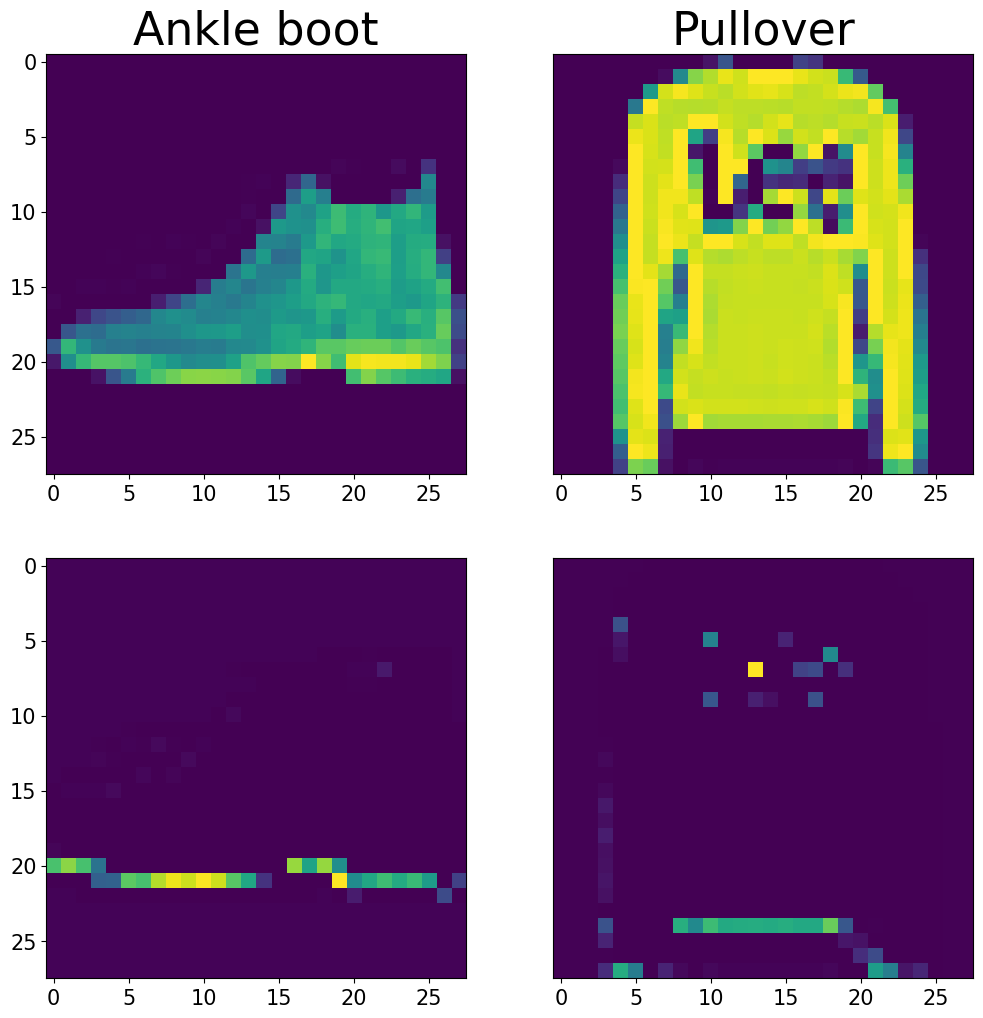

In [31]:
# plot activations vs input
images = list(X_test[:2, 0, :, :])
images.extend(activations)
plot_image_panel(images, labels=[classes[y_test[0]], classes[y_test[1]], '', ''])

#### Exercise:

Use CNNs to classify the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)